In [2]:
# =========================
# 1️⃣ IMPORTS
# =========================
import pandas as pd
import numpy as np
import random

# =========================
# 2️⃣ CREATION DU DATASET 100 LIGNES
# =========================

np.random.seed(42)  # pour reproductibilité

n_clients = 100

data = {
    "ID": [f"C{i+1}" for i in range(n_clients)],
    
    # A. Données Démographiques & Géographiques
    "Age": np.random.randint(18, 65, size=n_clients),
    "Genre": np.random.choice([0,1], size=n_clients),  # 0=F,1=M
    "Ville_Region": np.random.choice(["Casablanca","Rabat","Tanger","Marrakech","Rural"], size=n_clients),
    "Device_Prefere": np.random.choice(["Mobile","Desktop"], size=n_clients),
    
    # B. Données Transactionnelles
    "Anciennete_Mois": np.random.randint(1, 61, size=n_clients),  # 1 à 60 mois
    "Montant_Total_Depense": np.round(np.random.uniform(50, 2000, size=n_clients),2),
    "Panier_Moyen": np.round(np.random.uniform(20, 500, size=n_clients),2),
    "Frequence_Achat_Annuel": np.random.randint(1, 20, size=n_clients),
    "Diversite_Categories": np.random.randint(1,4, size=n_clients),  # 1 à 3
    "Taux_Utilisation_Promo": np.round(np.random.uniform(0.0, 1.0, size=n_clients),2),
    
    # C. Données Comportementales / Navigation
    "Temps_Moyen_Par_Visite": np.random.randint(30, 600, size=n_clients),  # secondes
    "Taux_Abandon_Panier": np.round(np.random.uniform(0.0, 0.5, size=n_clients),2),
    "Jours_Depuis_Derniere_Visite": np.random.randint(0, 90, size=n_clients),
    "Canal_Acquisition": np.random.choice(["Google","Facebook Ads","Newsletter","Direct"], size=n_clients),
    
    # D. Données Satisfaction / Réaction
    "Note_Moyenne_Laisses": np.round(np.random.uniform(1.0,5.0, size=n_clients),1),
    "Nombre_Reclamations": np.random.randint(0,5, size=n_clients),
    "Taux_Retour_Produit": np.round(np.random.uniform(0.0,0.5, size=n_clients),2),
    "Taux_Ouverture_Newsletter": np.round(np.random.uniform(0.0,1.0, size=n_clients),2),
    
    # Engagement supplémentaire
    "Visites_Mois": np.random.randint(1,10, size=n_clients),
    "Clicks": np.random.randint(1,30, size=n_clients)
}

df = pd.DataFrame(data)

# =========================
# 3️⃣ SAUVEGARDE DANS CSV
# =========================
df.to_csv("clients_100.csv", index=False)
print("✅ Fichier 'clients_100.csv' créé avec 100 clients et tous les attributs !")

# Aperçu
print(df.head())


✅ Fichier 'clients_100.csv' créé avec 100 clients et tous les attributs !
   ID  Age  Genre Ville_Region Device_Prefere  Anciennete_Mois  \
0  C1   56      1   Casablanca         Mobile               32   
1  C2   46      1   Casablanca        Desktop               23   
2  C3   32      0   Casablanca        Desktop               33   
3  C4   60      0   Casablanca        Desktop                3   
4  C5   25      0       Tanger        Desktop               18   

   Montant_Total_Depense  Panier_Moyen  Frequence_Achat_Annuel  \
0                1940.60         67.99                      13   
1                1443.46         45.67                      14   
2                 130.08        480.10                       3   
3                 827.70        426.63                       6   
4                 895.37        190.35                      18   

   Diversite_Categories  ...  Temps_Moyen_Par_Visite  Taux_Abandon_Panier  \
0                     3  ...                      68   

In [3]:
# -*- coding: utf-8 -*-
"""
K-Means pipeline simple et complet:
- Lire clients_100.csv
- Preprocessing: fillna, OneHot pour catégories, StandardScaler pour numériques
- Calcul Elbow (Inertia) et Silhouette (k=2..10)
- Tracer Elbow plot (matplotlib) + Silhouette plot
- Choisir best_k selon silhouette (قيمة أعلى) وتطبيق KMeans
- Sauvegarder résultats et profile par cluster
- Visualisation PCA 2D
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [4]:
# --------------------------
# 0. Charger le fichier CSV
# --------------------------
df = pd.read_csv("clients_100.csv")
print("✅ Fichier chargé:", df.shape)
print("Colonnes:", list(df.columns))

✅ Fichier chargé: (100, 21)
Colonnes: ['ID', 'Age', 'Genre', 'Ville_Region', 'Device_Prefere', 'Anciennete_Mois', 'Montant_Total_Depense', 'Panier_Moyen', 'Frequence_Achat_Annuel', 'Diversite_Categories', 'Taux_Utilisation_Promo', 'Temps_Moyen_Par_Visite', 'Taux_Abandon_Panier', 'Jours_Depuis_Derniere_Visite', 'Canal_Acquisition', 'Note_Moyenne_Laisses', 'Nombre_Reclamations', 'Taux_Retour_Produit', 'Taux_Ouverture_Newsletter', 'Visites_Mois', 'Clicks']


In [5]:
# --------------------------
# 1. Définir colonnes numériques et catégorielles (adaptable)
# --------------------------
numeric_cols = [c for c in [
    'ID', 'Age', 'Genre', 'Ville_Region', 'Device_Prefere', 'Anciennete_Mois', 'Montant_Total_Depense', 'Panier_Moyen', 'Frequence_Achat_Annuel', 'Diversite_Categories', 'Taux_Utilisation_Promo', 'Temps_Moyen_Par_Visite', 'Taux_Abandon_Panier', 'Jours_Depuis_Derniere_Visite', 'Canal_Acquisition', 'Note_Moyenne_Laisses', 'Nombre_Reclamations', 'Taux_Retour_Produit', 'Taux_Ouverture_Newsletter', 'Visites_Mois', 'Clicks'
] if c in df.columns]

cat_cols = [c for c in ["Genre","Ville_Region","Device_Prefere","Canal_Acquisition"] if c in df.columns]

print("Numériques détectées:", numeric_cols)
print("Catégorielles détectées:", cat_cols)


Numériques détectées: ['ID', 'Age', 'Genre', 'Ville_Region', 'Device_Prefere', 'Anciennete_Mois', 'Montant_Total_Depense', 'Panier_Moyen', 'Frequence_Achat_Annuel', 'Diversite_Categories', 'Taux_Utilisation_Promo', 'Temps_Moyen_Par_Visite', 'Taux_Abandon_Panier', 'Jours_Depuis_Derniere_Visite', 'Canal_Acquisition', 'Note_Moyenne_Laisses', 'Nombre_Reclamations', 'Taux_Retour_Produit', 'Taux_Ouverture_Newsletter', 'Visites_Mois', 'Clicks']
Catégorielles détectées: ['Genre', 'Ville_Region', 'Device_Prefere', 'Canal_Acquisition']


In [6]:

# --------------------------
# 2. Nettoyage simple (remplir valeurs manquantes)
# --------------------------
for c in numeric_cols:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna("UNKNOWN")

# (optionnel) s'assurer que types corrects
# df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [7]:
# --------------------------
# 3. Préprocessing: StandardScaler + OneHot
# --------------------------
# OneHotEncoder retourne numpy array (sparse=False pour compatibilité simple)
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(sparse=False, handle_unknown="ignore"), cat_cols)
], remainder="drop")

# Fit transform
X = preprocessor.fit_transform(df)
print("X shape après preprocessing:", X.shape)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [8]:
# --------------------------
# 4. Calcul Elbow (Inertia) et Silhouette (k de 1 إلى 10)
# --------------------------
K_min = 1
K_max = 10
Ks = list(range(K_min, K_max+1))

inertias = []
silhouettes = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)
    if k >= 2:
        labels_k = km.labels_
        sil = silhouette_score(X, labels_k)
        silhouettes.append(sil)
    else:
        silhouettes.append(np.nan)  # silhouette undefined for k=1

NameError: name 'X' is not defined

In [ ]:
# --------------------------
# 5. Tracer Elbow et Silhouette (matplotlib)
# --------------------------
plt.figure(figsize=(12,5))

# Elbow plot
plt.subplot(1,2,1)
plt.plot(Ks, inertias, marker='o', linestyle='-')
plt.xticks(Ks)
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertia (somme des distances au carré)')
plt.title('Elbow Method')
plt.grid(alpha=0.3)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(Ks, silhouettes, marker='o', linestyle='-')
plt.xticks(Ks)
plt.xlabel('Nombre de clusters K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score (k>=2)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# --------------------------
# 6. Choisir best_k automatiquement (max silhouette pour k>=2)
# --------------------------
# Si silhouette contient nan pour k=1, on ignore k=1
sil_array = np.array(silhouettes, dtype=np.float64)
valid_idx = np.where(~np.isnan(sil_array))[0]  # index valides (k>=2)
if len(valid_idx) > 0:
    best_idx = valid_idx[np.nanargmax(sil_array[valid_idx])]
    best_k = Ks[best_idx]
    print(f"✅ Meilleur K selon silhouette: K = {best_k} (score = {sil_array[best_idx]:.4f})")
else:
    best_k = 3
    print("⚠️ silhouette non calculable; choix par défaut K=3")

In [ ]:

# --------------------------
# 7. Fit final KMeans avec best_k
# --------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X)
df['cluster'] = labels_final

print("Répartition par cluster:")
print(df['cluster'].value_counts().sort_index())

In [ ]:
# --------------------------
# 8. Sauvegarder fichier résultant
# --------------------------
out_file = "clients_100_clusters.csv"
df.to_csv(out_file, index=False)
print(f"✅ Résultats sauvegardés dans: {out_file}")



In [ ]:
# --------------------------
# 9. Profiling simple par cluster (moyennes numériques + count)
# --------------------------
profile = df.groupby('cluster')[numeric_cols].mean().round(3)
profile['count'] = df.groupby('cluster').size()
print("\nProfile (moyennes par cluster):")
print(profile)

In [ ]:
# --------------------------
# 10. Visualisation PCA 2D (avec centres)
# --------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='tab10', s=40, alpha=0.8)
plt.title('Projection PCA 2D des clients (coloré par cluster)')
plt.xlabel('PC1'); plt.ylabel('PC2')

# dessiner centres de clusters projetés
centers = kmeans_final.cluster_centers_
centers_pca = pca.transform(centers)
for i, (cx, cy) in enumerate(centers_pca):
    plt.scatter(cx, cy, c='black', s=120, marker='X')
    plt.text(cx, cy, f' C{i}', color='white', weight='bold',
             bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))

plt.grid(alpha=0.2)
plt.show()



In [ ]:
# --------------------------
# 11. Option: créer libellés simples pour clusters (ex: HighValue / LowEngagement)
#           - méthode heuristique: on compare Montant_Total_Depense et Visites_Mois moyens
# --------------------------

labels_map = {}
if "Montant_Total_Depense" in numeric_cols and "Visites_Mois" in numeric_cols:
    # calculer z-score pour différenciation simple
    prof = profile.copy()
    prof_std = prof[['Montant_Total_Depense','Visites_Mois']].apply(lambda x: (x - x.mean())/x.std())
    # heuristique simple:
    for idx in prof.index:
        m = prof_std.loc[idx,'Montant_Total_Depense']
        v = prof_std.loc[idx,'Visites_Mois']
        if m > 0.5 and v > 0.0:
            labels_map[idx] = "HighValue_HighEngagement"
        elif m > 0.5:
            labels_map[idx] = "HighValue"
        elif v > 0.5:
            labels_map[idx] = "HighEngagement"
        else:
            labels_map[idx] = "LowValue_LowEngagement"
    # ajouter colonne descriptive
    df['cluster_label'] = df['cluster'].map(labels_map)
    print("\nCluster labels (heuristic):")
    for k,v in labels_map.items():
        print(f" cluster {k} -> {v}")

    # sauvegarder encore
    df.to_csv("clients_100_clusters_labeled.csv", index=False)
    print("✅ Fichier with labels saved: clients_100_clusters_labeled.csv")

else:
    print("Info: colonnes Montant_Total_Depense ou Visites_Mois manquantes -> pas d'étiquettes heuristiques créées.")

✅ Fichier 'clients_100.csv' créé.
✅ Fichier chargé: (100, 21)
Colonnes: ['ID', 'Age', 'Genre', 'Ville_Region', 'Device_Prefere', 'Anciennete_Mois', 'Montant_Total_Depense', 'Panier_Moyen', 'Frequence_Achat_Annuel', 'Diversite_Categories', 'Taux_Utilisation_Promo', 'Temps_Moyen_Par_Visite', 'Taux_Abandon_Panier', 'Jours_Depuis_Derniere_Visite', 'Canal_Acquisition', 'Note_Moyenne_Laisses', 'Nombre_Reclamations', 'Taux_Retour_Produit', 'Taux_Ouverture_Newsletter', 'Visites_Mois', 'Clicks']
Numériques détectées: ['Age', 'Anciennete_Mois', 'Montant_Total_Depense', 'Panier_Moyen', 'Frequence_Achat_Annuel', 'Diversite_Categories', 'Taux_Utilisation_Promo', 'Temps_Moyen_Par_Visite', 'Taux_Abandon_Panier', 'Jours_Depuis_Derniere_Visite', 'Note_Moyenne_Laisses', 'Nombre_Reclamations', 'Taux_Retour_Produit', 'Taux_Ouverture_Newsletter', 'Visites_Mois', 'Clicks']
Catégorielles détectées: ['Genre', 'Ville_Region', 'Device_Prefere', 'Canal_Acquisition']
X shape après preprocessing: (100, 29)


C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

✅ Meilleur K selon silhouette: K = 2 (score = 0.0583)


C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Répartition par cluster:
cluster
0    41
1    59
Name: count, dtype: int64
✅ Résultats sauvegardés dans: clients_100_clusters.csv


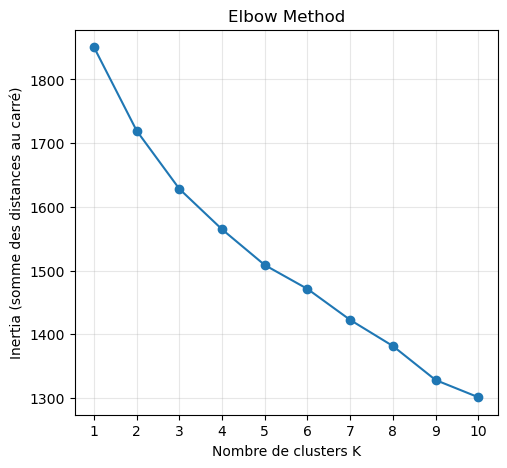

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ------------------------
# 0. (Optionnel) Génération du fichier clients_100.csv
# ------------------------
np.random.seed(42)
n_clients = 100
data = {
    "ID": [f"C{i+1}" for i in range(n_clients)],
    "Age": np.random.randint(18, 65, size=n_clients),
    "Genre": np.random.choice([0, 1], size=n_clients),  # 0=F,1=M
    "Ville_Region": np.random.choice(["Casablanca", "Rabat", "Tanger", "Marrakech", "Rural"], size=n_clients),
    "Device_Prefere": np.random.choice(["Mobile", "Desktop"], size=n_clients),
    "Anciennete_Mois": np.random.randint(1, 61, size=n_clients),
    "Montant_Total_Depense": np.round(np.random.uniform(50, 2000, size=n_clients), 2),
    "Panier_Moyen": np.round(np.random.uniform(20, 500, size=n_clients), 2),
    "Frequence_Achat_Annuel": np.random.randint(1, 20, size=n_clients),
    "Diversite_Categories": np.random.randint(1, 4, size=n_clients),
    "Taux_Utilisation_Promo": np.round(np.random.uniform(0.0, 1.0, size=n_clients), 2),
    "Temps_Moyen_Par_Visite": np.random.randint(30, 600, size=n_clients),
    "Taux_Abandon_Panier": np.round(np.random.uniform(0.0, 0.5, size=n_clients), 2),
    "Jours_Depuis_Derniere_Visite": np.random.randint(0, 90, size=n_clients),
    "Canal_Acquisition": np.random.choice(["Google", "Facebook Ads", "Newsletter", "Direct"], size=n_clients),
    "Note_Moyenne_Laisses": np.round(np.random.uniform(1.0, 5.0, size=n_clients), 1),
    "Nombre_Reclamations": np.random.randint(0, 5, size=n_clients),
    "Taux_Retour_Produit": np.round(np.random.uniform(0.0, 0.5, size=n_clients), 2),
    "Taux_Ouverture_Newsletter": np.round(np.random.uniform(0.0, 1.0, size=n_clients), 2),
    "Visites_Mois": np.random.randint(1, 10, size=n_clients),
    "Clicks": np.random.randint(1, 30, size=n_clients)
}
df = pd.DataFrame(data)
df.to_csv("clients_100.csv", index=False)
print("✅ Fichier 'clients_100.csv' créé.")

# ------------------------
# 1. Charger le fichier
# ------------------------
df = pd.read_csv("clients_100.csv")
print("✅ Fichier chargé:", df.shape)
print("Colonnes:", list(df.columns))

# ------------------------
# 2. Détecter colonnes catégorielles / numériques
# ------------------------
# Colonnes catégorielles que l'on veut forcer en encodage
cat_cols = [c for c in ["Genre", "Ville_Region", "Device_Prefere", "Canal_Acquisition"] if c in df.columns]

# Colonnes numériques (automatique) en excluant les cat_cols
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c not in cat_cols]
# retirer ID si présent dans numeric_cols
if "ID" in numeric_cols:
    numeric_cols.remove("ID")

print("Numériques détectées:", numeric_cols)
print("Catégorielles détectées:", cat_cols)

# ------------------------
# 3. Nettoyage rapide
# ------------------------
for c in numeric_cols:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna("UNKNOWN")

# ------------------------
# 4. Préprocessor : StandardScaler + OneHotEncoder (compatibilité sklearn)
# ------------------------
# OneHotEncoder: gérer changement de paramètre (sparse -> sparse_output selon version)
ohe_kwargs = {"handle_unknown": "ignore"}
try:
    # ancienne signature
    ohe = OneHotEncoder(sparse=False, **ohe_kwargs)
except TypeError:
    # nouvelle signature (scikit-learn >= 1.2)
    ohe = OneHotEncoder(sparse_output=False, **ohe_kwargs)

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", ohe, cat_cols)
], remainder="drop")

# Fit-transform (on laisse le DataFrame complet, ColumnTransformer sélectionnera les colonnes nommées)
X = preprocessor.fit_transform(df)
print("X shape après preprocessing:", X.shape)

# ------------------------
# 5. Calcul Elbow (inertia)
# ------------------------
K_min = 1
K_max = 10
Ks = list(range(K_min, K_max + 1))

inertias = []
silhouettes = []

for k in Ks:
    # KMeans exige n_clusters>=1
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)
    if k >= 2:
        labels_k = km.labels_
        sil = silhouette_score(X, labels_k)
        silhouettes.append(sil)
    else:
        silhouettes.append(np.nan)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Ks, inertias, marker='o', linestyle='-')
plt.xticks(Ks)
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertia (somme des distances au carré)')
plt.title('Elbow Method')
plt.grid(alpha=0.3)



# ------------------------
# 7. Choisir best_k automatiquement selon silhouette (k>=2)
# ------------------------
sil_array = np.array(silhouettes, dtype=np.float64)
valid_idx = np.where(~np.isnan(sil_array))[0]  # indices valides (k>=2)
if len(valid_idx) > 0:
    best_idx = valid_idx[np.nanargmax(sil_array[valid_idx])]
    best_k = Ks[best_idx]
    print(f"✅ Meilleur K selon silhouette: K = {best_k} (score = {sil_array[best_idx]:.4f})")
else:
    best_k = 3
    print("⚠️ silhouette non calculable; choix par défaut K=3")

# ------------------------
# 8. Fit final KMeans et attacher labels
# ------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X)
df['cluster'] = labels_final
print("Répartition par cluster:")
print(df['cluster'].value_counts().sort_index())

# ------------------------
# 9. Sauvegarder résultat
# ------------------------
out_file = "clients_100_clusters.csv"
df.to_csv(out_file, index=False)
print(f"✅ Résultats sauvegardés dans: {out_file}")





✅ ÉTAPE 0 : Données générées ((100, 10))
✅ ÉTAPE 1 : Données transformées. Nouvelle forme de la matrice X : (100, 18)


C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

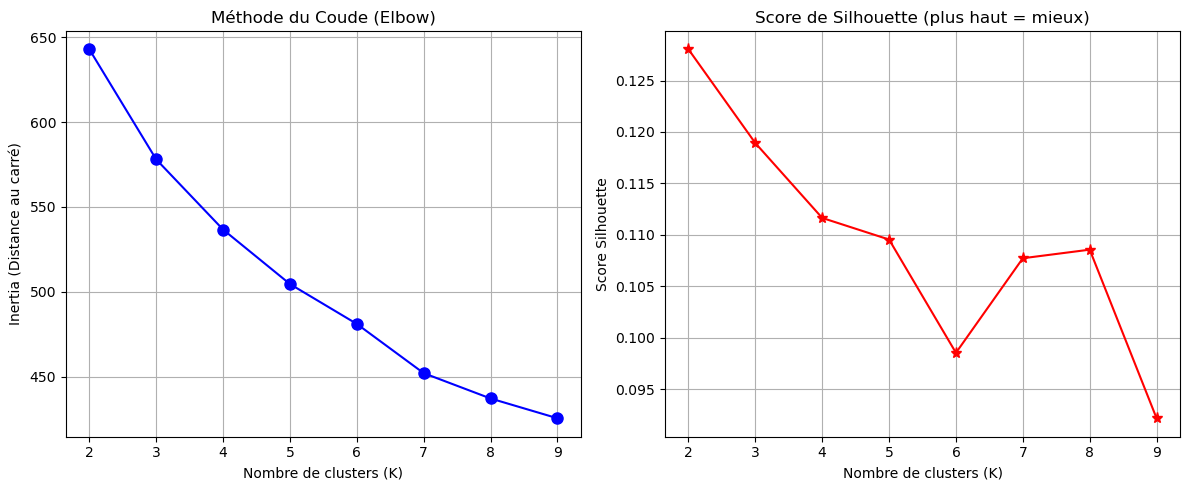

✅ ÉTAPE 3 : Meilleur K trouvé = 2


C:\Users\OH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


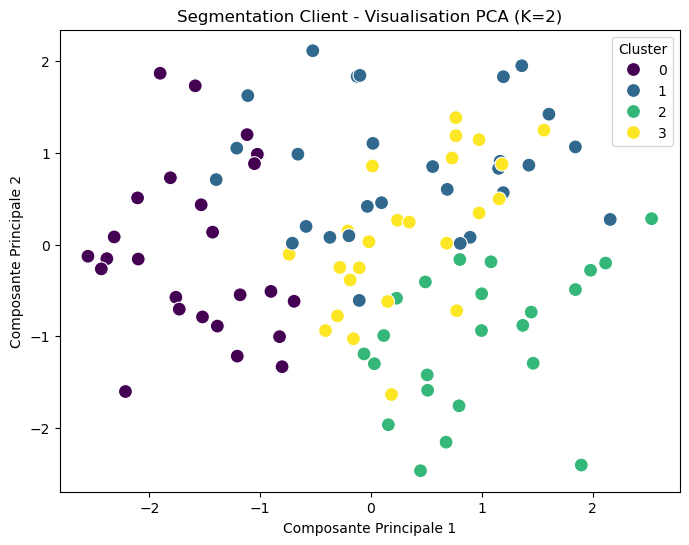


📊 TABLEAU DE BORD DES PERSONAS (Moyennes par cluster) :
           Age  Depense_Totale  Frequence_Achat  Visites_Mois  Note_Client  \
Cluster                                                                      
0        35.36         1490.63             4.64          9.16         2.72   
1        45.39          773.55             9.32          3.50         3.61   
2        55.17          721.53            14.22         10.70         2.95   
3        27.67          587.81            13.92          8.83         2.70   

         Nombre_Clients  
Cluster                  
0                    25  
1                    28  
2                    23  
3                    24  

✅ Fichier 'clients_resultats.csv' sauvegardé avec succès.
